In [14]:
import numpy as np
import matplotlib.pyplot as plt
from main import AutoEncoder, extract_latents
import torch
from sklearn.decomposition import PCA
recon_no = np.load("recon_no_ortho.npy")
recon_with = np.load("recon_with_ortho.npy")
ortho_with = np.load("ortho_with_ortho.npy")

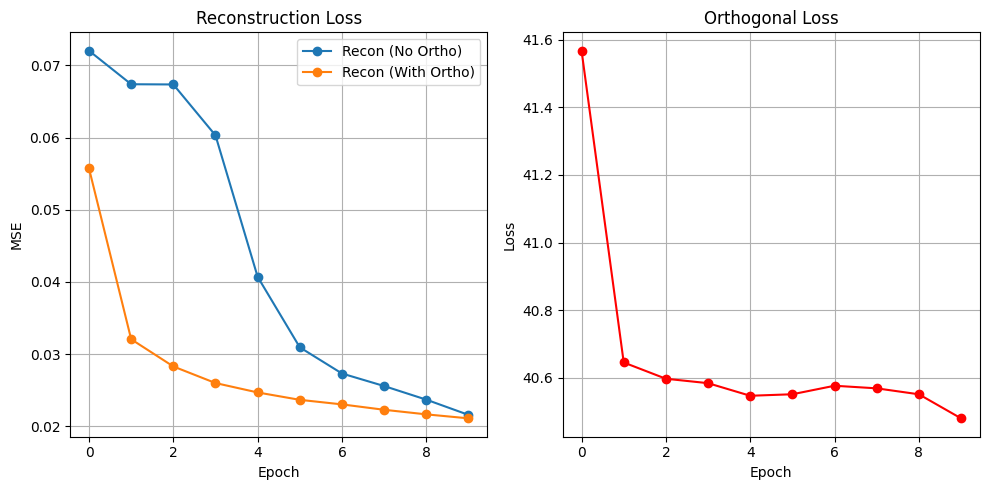

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(recon_no, marker='o', label="Recon (No Ortho)")
plt.plot(recon_with, marker='o', label="Recon (With Ortho)")
plt.title("Reconstruction Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ortho_with, marker='o', color='red')
plt.title("Orthogonal Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()

plt.savefig("training_loss.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [16]:
def plot_latent_space(class_latents, title, filename):
    
    all_vectors = []
    labels = []

    for digit in class_latents:
        for vec in class_latents[digit]:
            all_vectors.append(vec.squeeze())
            labels.append(digit)

    all_vectors = np.array(all_vectors)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(all_vectors)

    plt.figure(figsize=(6,6))
    
    for digit in range(10):
        idx = [i for i,l in enumerate(labels) if l == digit]
        plt.scatter(reduced[idx,0], reduced[idx,1], label=str(digit), alpha=0.6)

    plt.legend()
    plt.title(title)
    plt.grid(True)

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

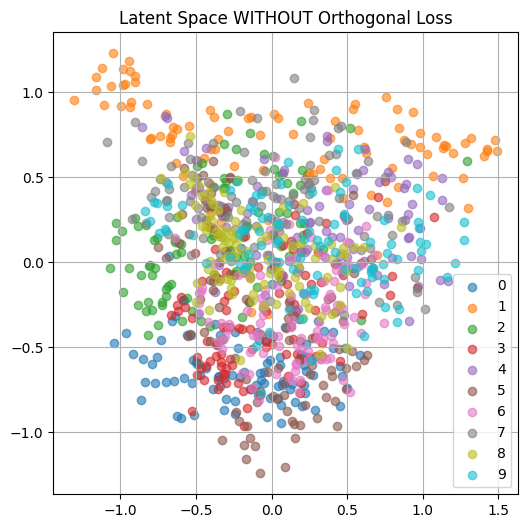

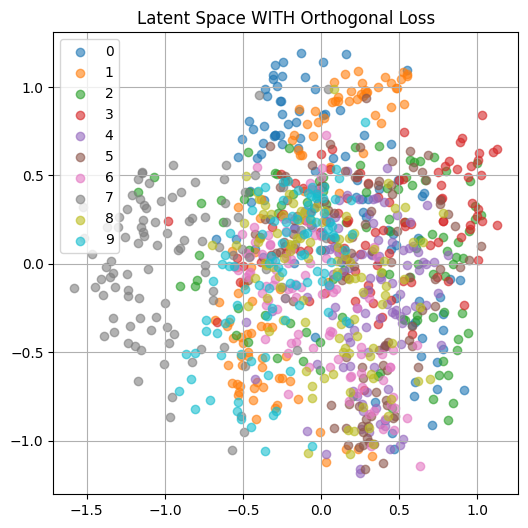

In [18]:
latents_no = np.load("latents_no_ortho.npy", allow_pickle=True).item()
latents_with = np.load("latents_with_ortho.npy", allow_pickle=True).item()
plot_latent_space(
    latents_no,
    "Latent Space WITHOUT Orthogonal Loss",
    "latent_without_ortho.png"
)

plot_latent_space(
    latents_with,
    "Latent Space WITH Orthogonal Loss",
    "latent_with_ortho.png"
)